In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
                                            
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing/housing.csv


# Dataset Description:

The house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.   

#  Variables in order:


 1. **CRIM**     per capita crime rate by town
 
 1. **ZN**       proportion of residential land zoned for lots over 25,000 sq.ft.
 
 1. **INDUS**    proportion of non-retail business acres per town
 
 1. **CHAS**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
 1. **NOX**      nitric oxides concentration (parts per 10 million)
 
 1. **RM**       average number of rooms per dwelling
 
 1. **AGE**      proportion of owner-occupied units built prior to 1940
 
 1. **DIS**      weighted distances to five Boston employment centres
 
 1. **RAD**      index of accessibility to radial highways
 
 1. **TAX**      full-value property-tax rate per $10,000
 
 1. **PTRATIO**  pupil-teacher ratio by town
 
 1. **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 1. **LSTAT**    % lower status of the population
 
 1. **MEDV**     Median value of owner-occupied homes in $1000's
 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load the dataset into pandas and get a peek at the underlying data in the dataframe.

In [3]:
name=['CRIM', 'ZN', 'INDUS', 'CHAS' ,'NOX' , 'RM' ,'AGE' ,'DIS', 'RAD','TAX' ,'PTRATIO' ,'B' ,'LSTAT' ,'MEDV' ]
housing = pd.read_csv('/kaggle/input/housing/housing.csv',names=name,delimiter=r"\s+")

In [4]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Dimensions of the dataframe

In [5]:
housing.shape

(506, 14)

In [6]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [8]:
housing.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
404,41.52920,0.0,18.10,0,0.693,5.531,85.4,1.6074,24,666.0,20.2,329.46,27.38,8.5
212,0.21719,0.0,10.59,1,0.489,5.807,53.8,3.6526,4,277.0,18.6,390.94,16.03,22.4
453,8.24809,0.0,18.10,0,0.713,7.393,99.3,2.4527,24,666.0,20.2,375.87,16.74,17.8
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99,24.5
367,13.52220,0.0,18.10,0,0.631,3.863,100.0,1.5106,24,666.0,20.2,131.42,13.33,23.1


# Missing values

In [9]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

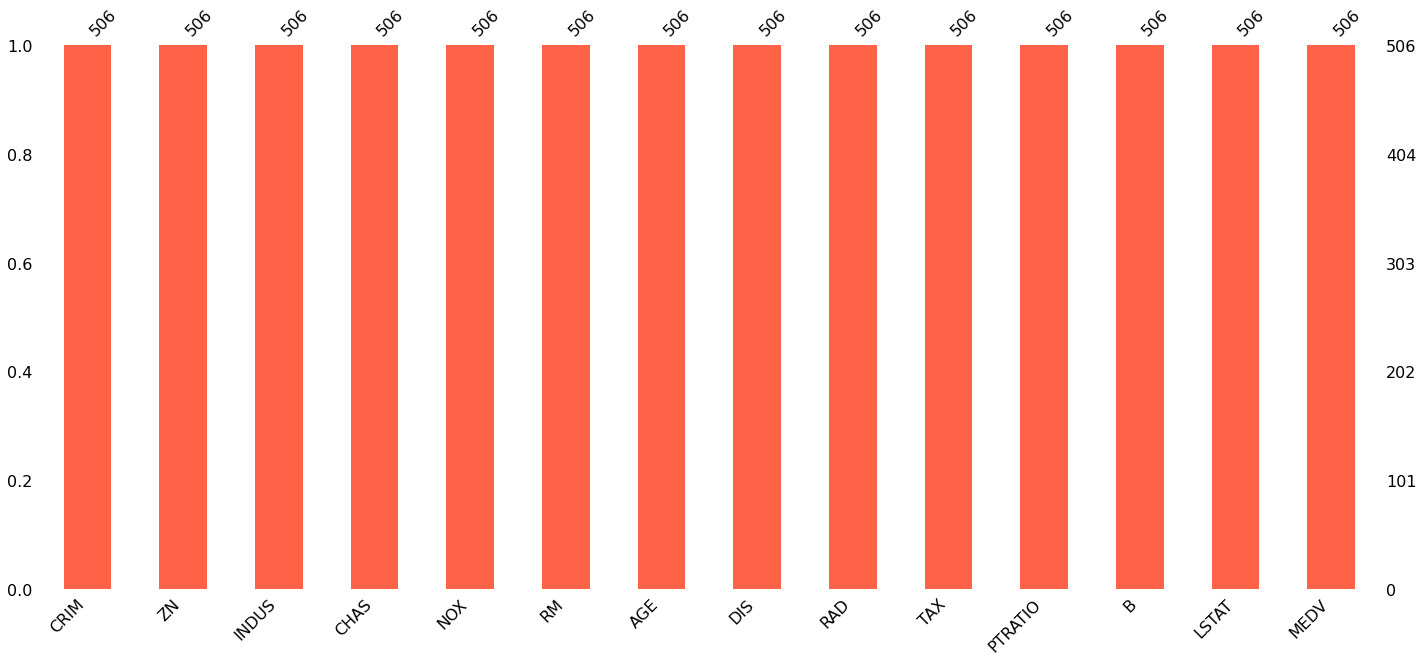

In [10]:
msno.bar(housing,color='tomato')

In [11]:
housing.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [12]:
housing['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

<AxesSubplot:>

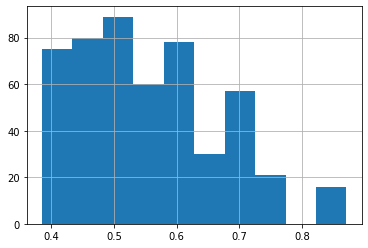

In [13]:
housing['NOX'].hist()

In [14]:
bins = [0,0.40,0.50,0.70,0.80,1]
labels = ['moderate','poor','very_poor','svere','very_severe']
housing['air_quality'] = pd.cut(housing['NOX'], bins=bins, labels=labels)

<AxesSubplot:>

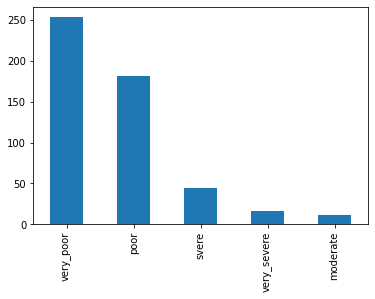

In [15]:
housing['air_quality'].value_counts().plot(kind='bar')

In [16]:
col=['ZN','RAD','air_quality']
housing[col]=housing[col].astype('category')

# Information about the schema

In [17]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CRIM         506 non-null    float64 
 1   ZN           506 non-null    category
 2   INDUS        506 non-null    float64 
 3   CHAS         506 non-null    int64   
 4   NOX          506 non-null    float64 
 5   RM           506 non-null    float64 
 6   AGE          506 non-null    float64 
 7   DIS          506 non-null    float64 
 8   RAD          506 non-null    category
 9   TAX          506 non-null    float64 
 10  PTRATIO      506 non-null    float64 
 11  B            506 non-null    float64 
 12  LSTAT        506 non-null    float64 
 13  MEDV         506 non-null    float64 
 14  air_quality  506 non-null    category
dtypes: category(3), float64(11), int64(1)
memory usage: 50.9 KB


# Statistical metrics of each column

In [18]:
housing.describe()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
housing.describe(include='category')

,ZN,RAD,air_quality
count,506.0,506,506
unique,26.0,9,5
top,0.0,24,very_poor
freq,372.0,132,253




# 
# Provide the following information about the dataframe;
# 

# 

# 

# 
# Conduct the following data pre-processing steps only as necessary along with the reason behind doing it with suitable steps;
# 

# 
# Erroneous/wrong values
# 
# Skewed data
# 
# Outliers
# 
# Perform exploratory data analysis and provide key insights derived from the same backed with suitable graphs and plots. Few hints to get you started;
# 
# Distribution of numerical variables
# 
# Distribution of categorical variables
# 
# Numerical vs Categorical plots
# 
# Numerical vs Numerical plots
